In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('data/listings_cleansed_pi.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2595.0,Skylit Midtown Castle Sanctuary,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,9/9/08,within a day,90%,21%,f,...,4.68,4.73,4.63,4.77,4.80,4.81,4.40,f,3,0.27
1,6848.0,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,15991,5/6/09,within a few hours,100%,100%,t,...,4.58,4.59,4.85,4.85,4.80,4.69,4.58,f,1,1.04
2,6872.0,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,16104,5/7/09,a few days or more,30%,33%,f,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,2,0.03
3,6990.0,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",16800,5/12/09,within an hour,100%,100%,t,...,4.88,4.83,4.95,4.96,4.95,4.85,4.85,f,1,1.37
4,7064.0,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",17297,5/15/09,NaN,NaN,0%,f,...,4.91,5.00,4.91,5.00,5.00,5.00,5.00,f,2,0.08


In [33]:
# df= df.drop(columns=['host_location', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'calendar_updated', 'license'])
# df.to_csv('data/listings_cleansed_pi.csv')

In [34]:
df.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       '

In [35]:
pd.set_option('display.max_rows', None)
df['amenities'].head()

0    ["Fire extinguisher", "Smoke alarm", "Stove", ...
1    ["Fire extinguisher", "Smoke alarm", "Stove", ...
2    ["Heating", "Washer", "Fire extinguisher", "Sm...
3    ["Fire extinguisher", "Smoke alarm", "Stove", ...
4    ["Heating", "Washer", "Dishes and silverware",...
Name: amenities, dtype: object

### Explore amenities column
- Processes amenity data from a DataFrame by converting amenity strings into lists, normalizing them, and counting occurrences using `Counter`. 
- Visualizes the most and least common amenities with bar charts and calculates the variance and mean of amenity counts per listing. 

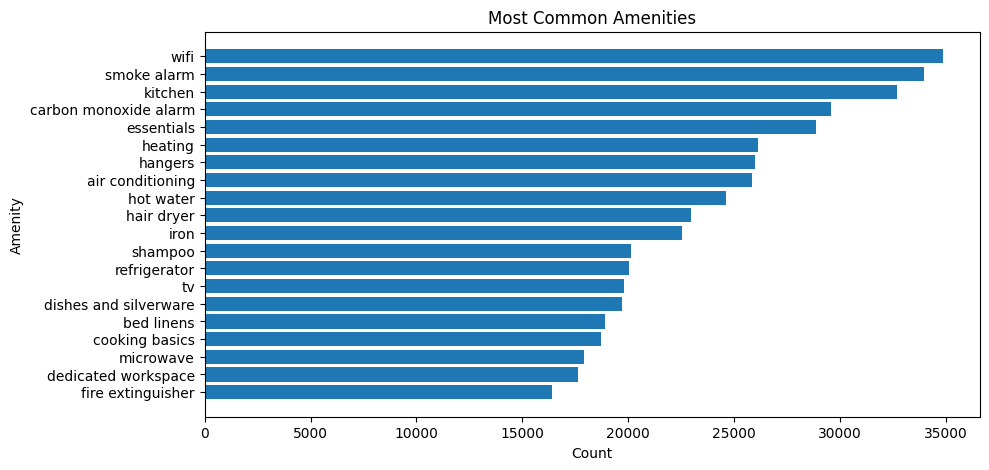

(227.04496144456584, 25.846489826355597)

In [36]:
import ast
import matplotlib.pyplot as plt
from collections import Counter

# Function to clean and extract amenities
def extract_amenities(amenities):
    if isinstance(amenities, str):
        try:
            amenities_list = ast.literal_eval(amenities)  # Convert string to list
            if isinstance(amenities_list, list):
                return [str(item).strip().lower() for item in amenities_list]  # Normalize
        except (ValueError, SyntaxError):
            return []
    return []

# Apply the function
df["amenities"] = df["amenities"].apply(extract_amenities)

# Flatten the list to count occurrences
all_amenities = [item for sublist in df["amenities"] for item in sublist]
amenity_counts = Counter(all_amenities)

amenities_df = pd.DataFrame(amenity_counts.items(), columns=["Amenity", "Count"]).sort_values(by="Count", ascending=False).reset_index()

# Plot the top most common amenities
plt.figure(figsize=(10, 5))
plt.barh(amenities_df["Amenity"][:20], amenities_df["Count"][:20])
plt.xlabel("Count")
plt.ylabel("Amenity")
plt.title("Most Common Amenities")
plt.gca().invert_yaxis()
plt.show()

# Compute variance of amenities per listing
df["amenity_count"] = df["amenities"].apply(len)
amenity_variance = df["amenity_count"].var()
amenity_mean = df["amenity_count"].mean()

amenity_variance, amenity_mean

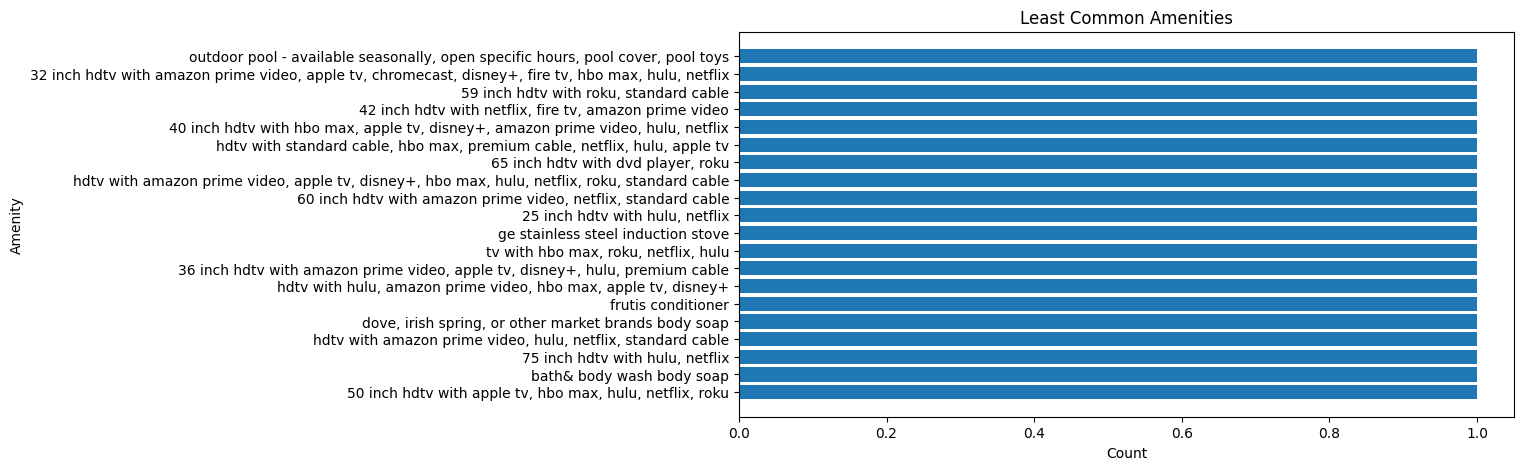

In [37]:
amenities_df = amenities_df.sort_values(by="Count", ascending=True)

# Plot the least most common amenities
plt.figure(figsize=(10, 5))
plt.barh(amenities_df["Amenity"][:20], amenities_df["Count"][:20])
plt.xlabel("Count")
plt.ylabel("Amenity")
plt.title("Least Common Amenities")
plt.gca().invert_yaxis()
plt.show()

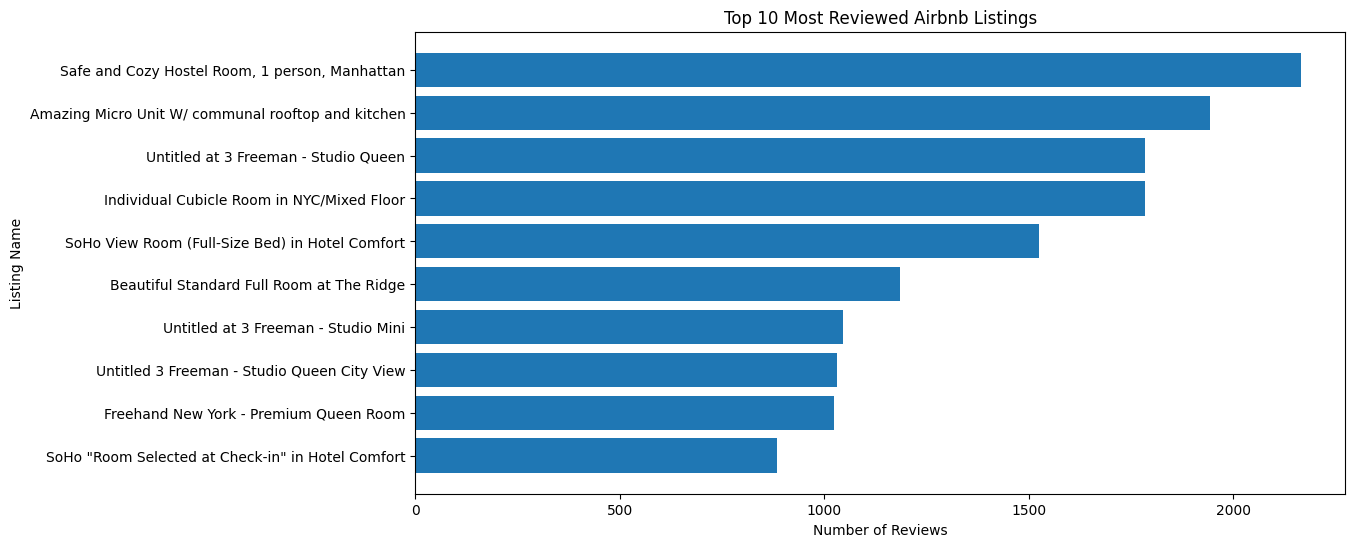

In [38]:
# Top 10 listings based on reviews
top_listings = df.nlargest(10, 'number_of_reviews')

plt.figure(figsize=(12, 6))
plt.barh(top_listings['name'], top_listings['number_of_reviews'])
plt.xlabel('Number of Reviews')
plt.ylabel('Listing Name')
plt.title('Top 10 Most Reviewed Airbnb Listings')
plt.gca().invert_yaxis()
plt.show()

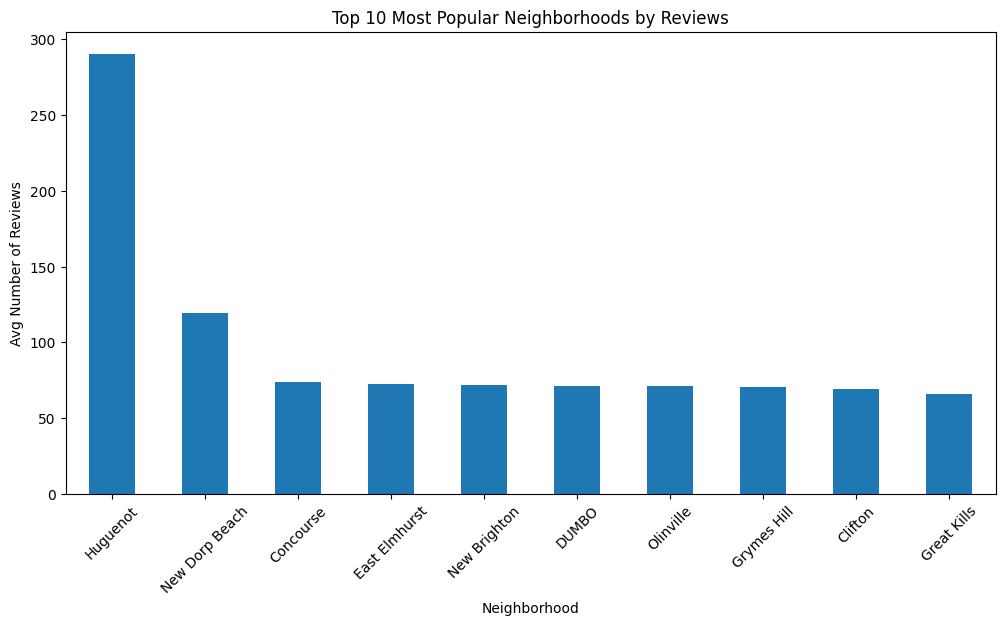

In [39]:
# Popularity by neighborhood

# Group by neighborhood and calculate the mean number of reviews
neighborhood_reviews = df.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
neighborhood_reviews.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Avg Number of Reviews')
plt.title('Top 10 Most Popular Neighborhoods by Reviews')
plt.xticks(rotation=45)
plt.show()